In [3]:
import requests
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

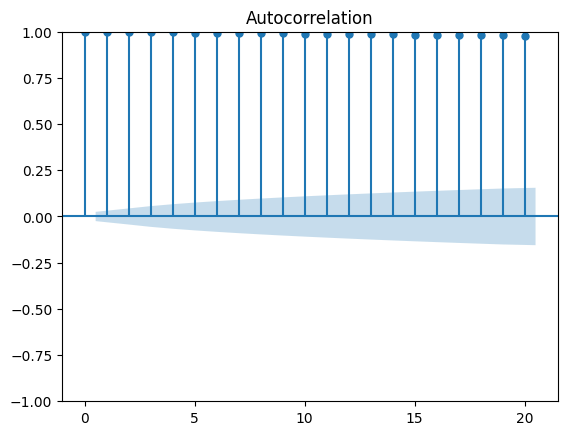

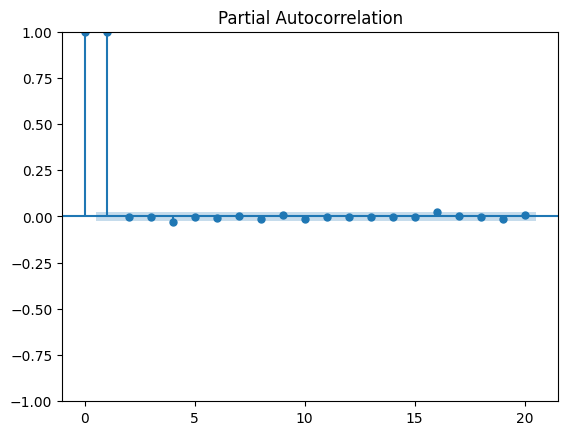

In [5]:
url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_DAILY_ADJUSTED",
    "symbol": "AAPL",
    "outputsize": "full",
    "apikey": "FUPT81G3YM7VYKAX",
    "entitlement": "delayed"
}
response = requests.get(url, params)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data["Time Series (Daily)"]).T
    df['date'] = pd.to_datetime(df.index)
    df['adj_close'] = df['5. adjusted close'].astype(float)
        
    # Plot ACF
    acf_plot = plot_acf(df['adj_close'], lags=20)

    # Plot PACF
    pacf_plot = plot_pacf(df['adj_close'], lags=20)
        
else:
    print("NO")